initialized things
Rdesigneur: Elec model has 204 compartments and 1164 spines on 21 compartments.
Chem part of model has  744 dendrite voxels X 3 pools,
    
180 spine voxels X 3 pools, 180 psd voxels X 3 pools.
built model


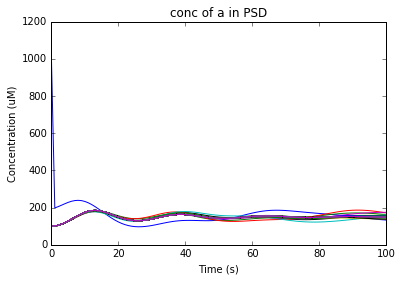

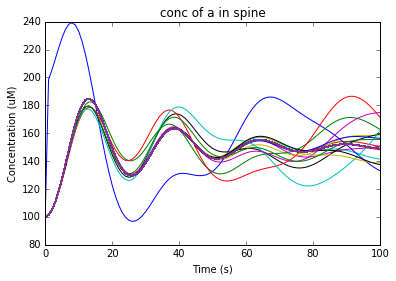

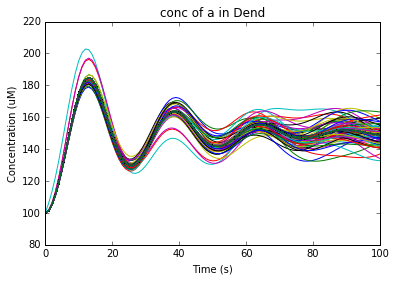

In [1]:
%matplotlib inline
import moose
import rdesigneur as rd

library = moose.Neutral( '/library' )
compt = rd.makeChemOscillator( 'osc' )
compt.volume = 1e-18
moose.copy( compt, '/library/osc', 'spine' )
moose.element( '/library/osc/spine' ).volume = 1e-19
moose.copy( compt, '/library/osc', 'psd' )
moose.element( '/library/osc/psd' ).volume = 1e-20

rdes = rd.rdesigneur(
    turnOffElec = True,
    useGssa = False,
    cellProto = [[ './cells/h10.CNG.swc', 'elec']],
    spineProto = [[ 'makePassiveSpine()', 'spine' ] ],
    spineDistrib = [ ["spine", '#apical#,#dend#', '10e-6', '1e-6' ]],
    chemProto = [['/library/osc', 'osc']],
    chemDistrib =[[ 'osc', '#apical#,#dend#', 'install', 'H(p - 5e-4)' ]],
    plotList = [
        ['#', '1', 'psd/a', 'conc', 'conc of a in PSD'],
        ['#', '1', 'spine/a', 'conc', 'conc of a in spine'],
        ['#', '1', 'dend/a', 'conc', 'conc of a in Dend']
    ]
)

print "initialized things"

rdes.buildModel()

print "built model"

av = moose.vec( '/model/chem/psd/a' )
av[0].concInit *= 10   # change this out to see what is happening

'''
dv = moose.vec( '/model/chem/dend/a' )
print len( dv )
dv[0].concInit *= 2
'''

moose.reinit()
moose.start( 100 )
# rdes.displayMoogli( 1, 400, 0.001 ) # dt, runtime, rotation
rdes.display()